In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem import rdDepictor
import matplotlib
import matplotlib.cm as cm
from IPython.display import Image
from IPython.display import SVG,display
from rdkit.Chem import SDWriter
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import rdFMCS

In [2]:
def mol_standard(mol):
    Uncharger=rdMolStandardize.Uncharger()
    
    clean_mol = rdMolStandardize.Cleanup(mol)
    return Uncharger.uncharge(clean_mol)

# Load SDF we want to render

In [3]:
df=pd.read_csv('pairs_amberTI_DDG.csv')

# Make a CleanMol as 2D (rather than 3D)

In [5]:
PandasTools.AddMoleculeColumnToFrame(df,'Smiles_2','ROMol')

In [7]:
df['ROMol']=df['ROMol'].apply(mol_standard)

In [10]:
df['RBFE_calc_DDG_kcal_mol']=df['RBFE_calc_DDG_kcal_mol'].astype(float)

In [11]:
df=df.sort_values(by=['RBFE_calc_DDG_kcal_mol'])

# Get MCS to align to

In [13]:
mcs=rdFMCS.FindMCS(list(df['ROMol']),atomCompare=rdFMCS.AtomCompare.CompareAny)
template=AllChem.MolFromSmarts(mcs.smartsString)
AllChem.Compute2DCoords(template)

0

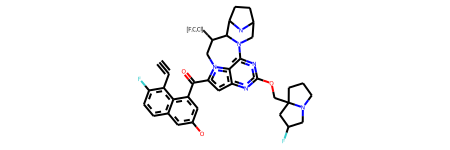

In [14]:
template

# Align each mol to the template

In [15]:
for index,row in df.iterrows():
    if row['ROMol'].HasSubstructMatch(template):
        AllChem.GenerateDepictionMatching2DStructure(row['ROMol'],template)

# Render grid, save image file

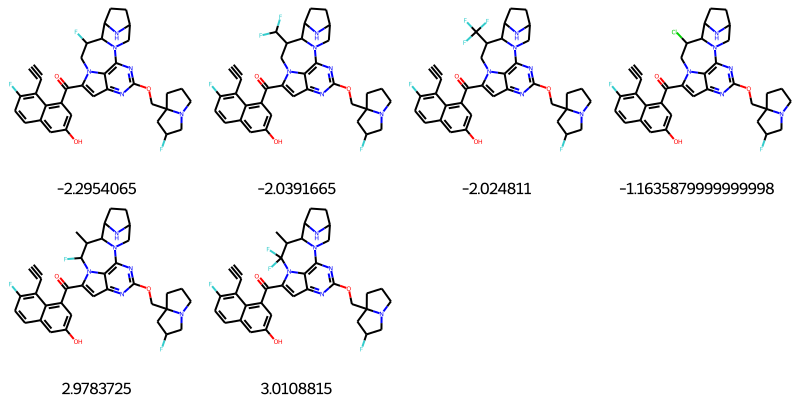

In [21]:
PandasTools.FrameToGridImage(df,column='ROMol',legendsCol='RBFE_calc_DDG_kcal_mol',molsPerRow=4,subImgSize=(200,200))

In [22]:
img=PandasTools.FrameToGridImage(df,column='ROMol',legendsCol='RBFE_calc_DDG_kcal_mol',molsPerRow=4,subImgSize=(200,200),returnPNG=False)

In [23]:
img.save('aligned.png')